## Chernoff's inequality program

In [1]:
# imports
import numpy as np
from scipy.stats import norm #normは正規分布
import matplotlib.pyplot as plt

## variables
# X scale
X = np.arange(0, 100, 0.1)
# Y scale
# pdfは, rvsが確率密度関数
# E[x]:50, V[x]:10^2
Ex = 50
Y_pdf = norm.pdf(X, Ex, 10)
Y_rvs = norm.rvs(loc=Ex, scale=10, size=len(X))
# 任意の a > 0
a = 60
A = np.full(shape=len(X), fill_value=a)


#### Markov's inequality program

In [2]:
# function return Markov's inqeuality upper bound
def Markov():
    return Ex/a


#### What is X & Y ?

In [3]:
X[::10]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99.])

In [4]:
Y_pdf[::100]

array([1.48671951e-07, 1.33830226e-05, 4.43184841e-04, 5.39909665e-03,
       2.41970725e-02, 3.98942280e-02, 2.41970725e-02, 5.39909665e-03,
       4.43184841e-04, 1.33830226e-05])

In [5]:
Y_rvs[::100]

array([42.2838395 , 42.31884312, 53.85787425, 58.95580708, 50.56967979,
       49.86480686, 60.66119244, 46.33686111, 34.24169706, 43.85666567])

#### Calc Chernoff's ineuality

In [6]:
# ref : https://note.nkmk.me/python-for-usage/
# function return Chernoff's inqeuality upper bound
def Chernoff(t):
    # 期待値は総和で計算
    e_tx = 0
    for loop in Y_rvs:
        e_tx += np.exp(t*loop)
    
    return (e_tx / len(Y_rvs))/ np.exp(t*a)

# test
loop_list = np.arange(0.001, 2, 0.001)
min_apper_bound = [2147483647, -1]
for loop in loop_list:
    answer = Chernoff(loop)
    if answer < float(min_apper_bound[0]):
        min_apper_bound[0] = answer
        min_apper_bound[1] = loop
print("チェルノフの不等式の最小の値は、"+str(min_apper_bound[0])+" (t = '"+str(min_apper_bound[1])+"')")

チェルノフの不等式の最小の値は、0.5816062192316277 (t = '0.109')


In [7]:
# 結果の比較
Prx = 0
for loop in Y_rvs:
    if loop > a:
        Prx += 1/len(Y_rvs)

print("Pr(x>=a) = "+str(Prx))
print("  <= E[exp(tx)]/exp(ta) = "+str(min_apper_bound[0]))
print("    <= E[x]/a = "+str(Markov()))


Pr(x>=a) = 0.1410000000000001
  <= E[exp(tx)]/exp(ta) = 0.5816062192316277
    <= E[x]/a = 0.8333333333333334


#### plot graph

In [8]:
# Y_rvs の 10刻みの棒グラフ用の変数
size = np.arange(0,10,1)
Pr10 = np.full(len(size), 0.)

for loop in size:
    for Pr in Y_rvs:
        if 10*loop <= Pr < 10*(loop+1):
            Pr10[loop] += 1/len(Y_rvs)
print("0     1     2     3     4     5     6     7     8     9     ")
print(Pr10)


0     1     2     3     4     5     6     7     8     9     
[0.    0.    0.016 0.117 0.355 0.371 0.122 0.018 0.001 0.   ]


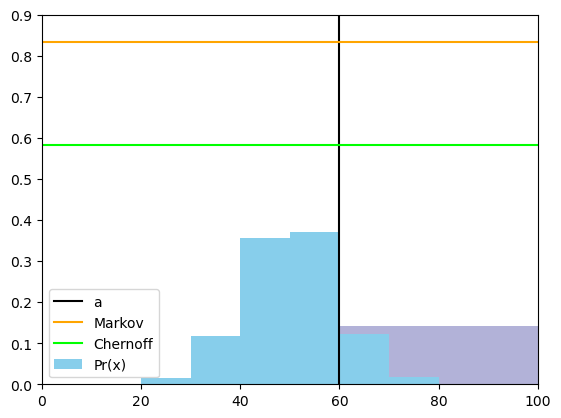

In [11]:
## #グラフの表示
# 基本の設定
plt.xlim(0,100)
plt.ylim(0,0.9)

# aの直線
plt.axvline(60, color='black', label="a")

# 確率分布 (10刻み)
plt.bar(60+20, Pr10[6]+Pr10[7]+Pr10[8]+Pr10[9], 40, color='navy', alpha=0.3)
plt.bar(size*10+5, Pr10, 10, color='skyblue', label="Pr(x)")

# マルコフ、チェルノフ
plt.axhline(Markov(), color='orange', label="Markov")
plt.axhline(min_apper_bound[0], color='lime', label="Chernoff")

# 表示
plt.legend()
plt.show()